# Принятие решений на основе данных

Анализируем гипотезы для увеличения выручки крупного интернет-магазина совместно с отделом маркетинга: сперва приоритизируем гипотезы, затем запуститм A/B-тест и проанализируем результаты. 

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

*Reach — скольких пользователей затронет изменение, которое вы хотите внести;*

*Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;*

*Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;*

*Efforts — сколько стоит протестировать эту гипотезу.* 

### Примените фреймворк ICE для приоритизации гипотез. 
Отсортируйте их по убыванию приоритета.

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Наиболее перспективные гипотезы по ICE - гипотезы 8, 0, 7, 6 и 2.

### Примените фреймворк RICE для приоритизации гипотез. 
Отсортируйте их по убыванию приоритета.

In [5]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


По RICE список наиболее перспективных гипотез не изменился, однако изменился порядок приоритизации гипотез: 7, 2, 0, 6, 8.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [6]:
hypothesis.iloc[[7, 2, 0, 6, 8]]

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


Метод RICE отличается от метода ICE тем, что учитывает, как много пользователей затронет гипотеза (параметр Reach). Изменение в порядке приоритизации гипотез при применении фреймворков ICE и RICE обусловлено тем, что у гипотез 7 и 2 очень высокий параметр reach, а у гипотезы 8, наоборот, очень низкий.


## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders.head(5))
display(visitors.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Пропусков в данных нет, явных дубликтов нет. Приведем колонки с датами к соответствующему формату.

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Анализ A/B-теста

Создадим переменные, необходимые для дальнейшего анализа.

In [12]:
# Создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group' из таблицы orders. 
datesGroups = orders[['date','group']].drop_duplicates()
# Объявляем переменную ordersAggregated, содержащую данные с датой, группой A/B-теста, числом уникальных заказов (кумулятивным), числом уникальных пользователей (кумулятивным), совершивших хотя бы 1 заказ, кумулятивную сумму выручки
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date']<= x['date'], orders['group'] == x['group'])]
                           .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}),axis = 1)
                    .sort_values(by=['date','group']))

# Объявляем переменную visitorsAggregated, содержащую дату, группу A/B-теста, количество уникальных посетителей (кумулятивное)
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date']<= x['date'], visitors['group'] == x['group'])]
                             .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
                      .sort_values(by=['date','group']))
# Определяем переменную cumulativeData - объединение ordersAggregated и visitorsAggregated по колонкам 'date', 'group'
cumulativeData =  ordersAggregated.merge(visitorsAggregated , left_on = ['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


#### Построим график кумулятивной выручки по группам. 
Сделайте выводы и предположения.

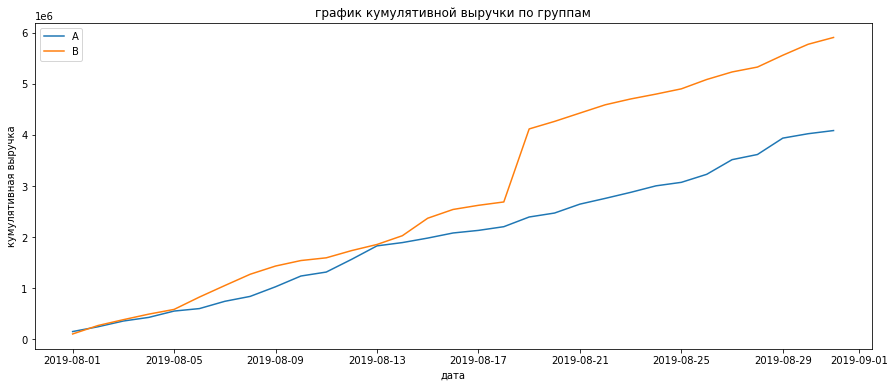

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.subplots(figsize = (15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel("дата")
plt.ylabel("кумулятивная выручка")
plt.legend() 
plt.title('график кумулятивной выручки по группам')
plt.show();

Выручка почти равномерно увеличивается в течение всего теста. 
У группыы В график выручки имеет резкий скачок в районе 18 или 19 сентября. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем ниже.

#### Построим график кумулятивного среднего чека по группам. 


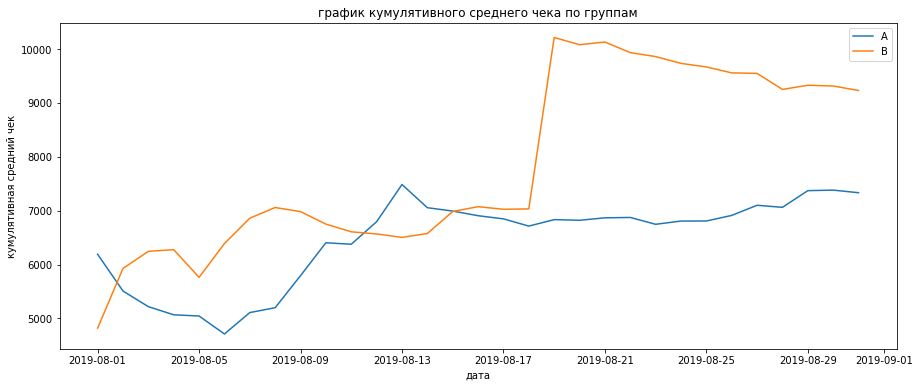

In [14]:
plt.subplots(figsize = (15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel("дата")
plt.ylabel("кумулятивная средний чек")
plt.legend() 
plt.title('график кумулятивного среднего чека по группам') ;

Средний чек стабилизировался во воторой половине теста и к концу теста для группы A установился , а для группы B продолжает падать. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 


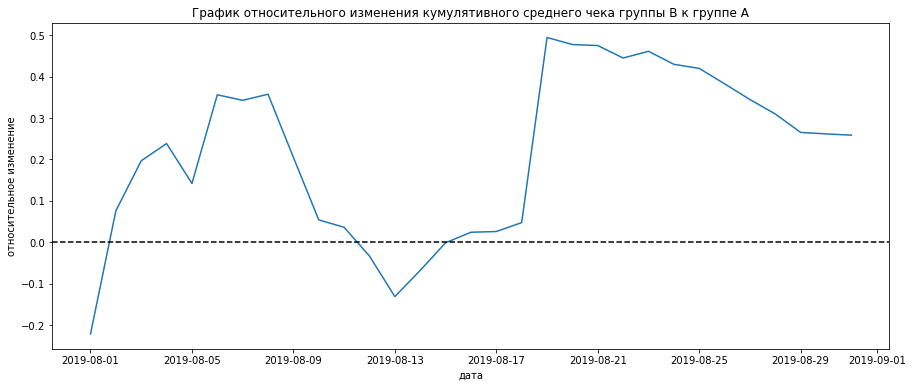

In [15]:
plt.subplots(figsize = (15,6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

График различия между сегментами имеет резкие скачки: результаты теста сильно менялись в некоторые дни. Возможно, в эти дни были совершены аномальные заказы, проанализируем аномалии ниже

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. 


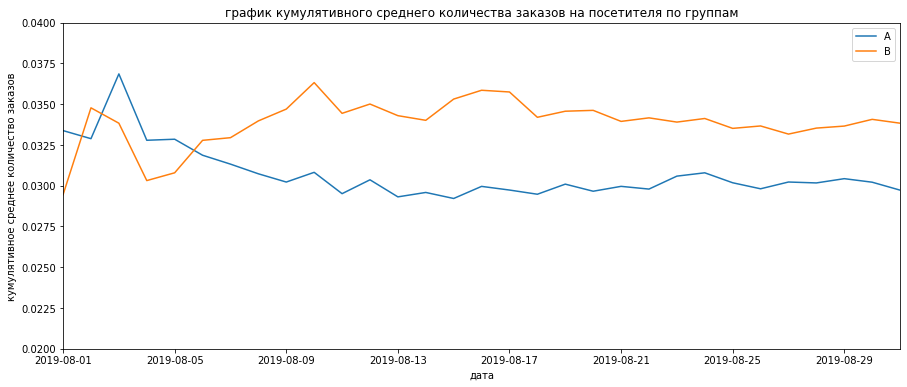

In [16]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.subplots(figsize = (15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.xlabel("дата")
plt.ylabel("кумулятивное среднее количество заказов")
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.02, 0.04]) ;

В начале теста группа В имела меньшее среднее количество заказов на одного пользователя, но к концу первой недели теста среднее количество заказов у группы В превысило группу А и к концу теста стабилизировалось около одного значения (большего, чем у группы А). 

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

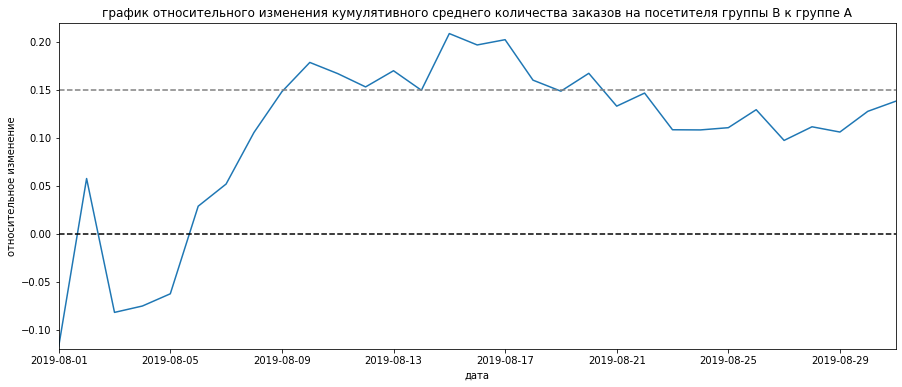

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.subplots(figsize = (15,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

plt.xlabel("дата")
plt.ylabel("относительное изменение")
plt.title('график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.12, 0.22]) ;

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. 
В целом отношение среднего количества заказов на посетителя установилось около прироста в 10% отновистельно группы А

#### Построим точечный график количества заказов по пользователям. 


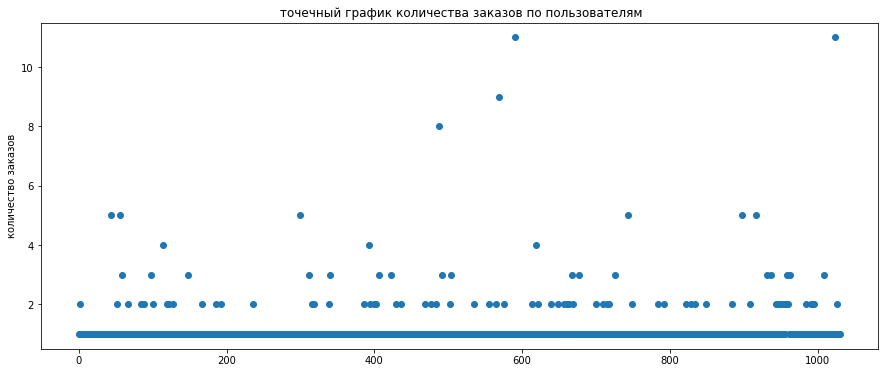

In [18]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.subplots(figsize = (15,6))
plt.scatter(x_values, ordersByUsers['orders'])

plt.ylabel("количество заказов")
plt.title(' точечный график количества заказов по пользователям'); 

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 
Их точная доля не ясна — непонятно, считать их аномалиями или нет. 
Посчитаем выборочные перцентили количества заказов на одного пользователя:

#### Расчет 95-го и 99-го перцентилей количества заказов на пользователя. 


In [19]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% пользователей оформляли больше 2 заказов. 
Выберем 2 заказа на  пользователя за верхнюю границу числа заказов, и будем отсеивать аномальных пользователей по ней. Удалением таких строк займёмся ниже.

#### Построим точечный график стоимостей заказов. 


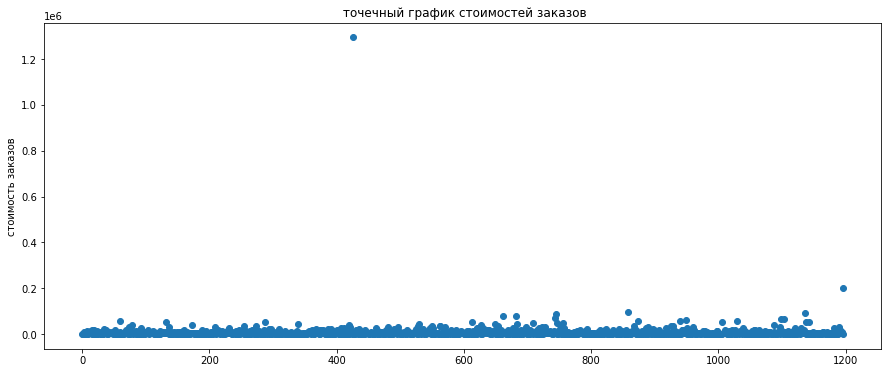

In [20]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.subplots(figsize = (15,6))
plt.scatter(x_values, orders.revenue)
plt.ylabel("стоимость заказов")
plt.title(' точечный график стоимостей заказов');

В среднем заказы оформляются на суммы до 50 тыс, но есть выбросы. Заказ на 1.2 млн выглядит аномально.
Найдем выборочные перцентили.

#### Расчет 95-го и 99-го перцентилей стоимости заказов. 


In [21]:
print(np.percentile(orders.revenue, [90,95,99]))

[18168.  28000.  58233.2]


Не более чем у 5% заказов сумма чека больше 28000. И не более чем у 1% заказов сумма чека больше 58233 руб. 
Выберем 28000 за верхнюю границу суммы заказа, так отсеятся 5% заказов с наибольшей стоимостью.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

H0 гипотеза: среднее кол-во заказов на посетителя в группе А равно среднему количеству заказов на посетителяв группе В.

H1 гипотеза: средние кол-ва заказов на посетителя в двух группах различаются.

Уровень значимости alpha = .05

Для проверки используем метод Уилкоксона-Манна-Уитни - непараметрический метод, который работает с рангами, — номерами значений в упорядоченном ряду и не учитывавет сами значения. Поскольку в данных есть большие выбросы, то параметрические методы сработают хуже (одно выбивающееся значение может существенно влиять на результат)


In [22]:
ordersByUsersA  = orders[orders.group == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB  = orders[orders.group == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum()  - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum()  - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value: ","{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост среднего кол-ва заказов в группе В относительно группы А:", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:  0.01679
Относительный прирост среднего кол-ва заказов в группе В относительно группы А: 0.138


p-value меньше 5%, поэтому отвергаем нулевую гипотезу: на "сырых" данных можем сделать вывод, что в среднем кол-ве заказов на посетителя между группами есть статистически значимые различия. Относительный прирост среднего группы В к группе А равен 13.8%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 


H0 гипотеза: средний чека заказа в группе А равен среднему чеку заказа в группе В.

H1 гипотеза: средние чеки в двух группах различаются.

Уровень значимости alpha = .05

Для проверки используем метод Уилкоксона-Манна-Уитни - непараметрический метод, который работает с рангами, — номерами значений в упорядоченном ряду и не учитывавет сами значения. Поскольку в данных есть большие выбросы, то параметрические методы сработают хуже (одно выбивающееся значение может существенно влиять на результат)


In [23]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост средней чуммы чека в группе В относительно группы А:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Относительный прирост средней чуммы чека в группе В относительно группы А: 0.259


p-value больше 5%, поэтому не можем отвергнуть нулевую гипотезу о равенстве в среднем чеке заказа между группами, хотя относительное различие среднего чека между группами и составляет аж 25.9%.

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
Сделайте выводы и предположения.

In [24]:
# определяем аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId'] #по рекомендации установила порог для суммы чека на уровне 95% перцентиля
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

H0 гипотеза: на очищенных данных среднее кол-во заказов на посетителя в группе А равно среднему количеству заказов на посетителяв группе В.

H1 гипотеза: средние кол-ва заказов на посетителя в двух группах различаются на очищенных данных.

Уровень значимости alpha = .05

Для проверки используем метод Уилкоксона-Манна-Уитни - непараметрический метод, который работает с рангами, — номерами значений в упорядоченном ряду и не учитывавет сами значения. Поскольку в данных есть большие выбросы, то параметрические методы сработают хуже (одно выбивающееся значение может существенно влиять на результат)


In [25]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "A"')['visitors'].sum()- len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "B"')['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост среднего кол-ва заказов в группе В относительно группы А по очищенным данным:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


p-value: 0.01304
Относительный прирост среднего кол-ва заказов в группе В относительно группы А по очищенным данным: 0.173


Статистическая значимость достигнута: группа В лучше группы А по среднему количеству заказов на посетителя *(отвергаем нулевую гипотезу о равенстве средних)*. Причем на очищенных данных относительный прирост группы B к группе А составляет 17.3%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 


H0 гипотеза: средний чек в группе А равен среднему чеку в группе В на очищенных данных.

H1 гипотеза: средние кол-ва заказов на посетителя в двух группах различаются на очищенных данных.

Уровень значимости alpha = .05

Для проверки используем метод Уилкоксона-Манна-Уитни - непараметрический метод, который работает с рангами, — номерами значений в упорядоченном ряду и не учитывавет сами значения. Поскольку в данных есть большие выбросы, то параметрические методы сработают хуже (одно выбивающееся значение может существенно влиять на результат)


In [26]:

print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный прирост среднего чека в группе В относительно группы А по очищенным данным:",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value 0.738
Относительный прирост среднего чека в группе В относительно группы А по очищенным данным: -0.020


После удаления выбросов p-value еще увеличилось, поэтому не можем отвергнуть нулевую гипотезу о равенстве в среднем чеке заказа между группами. И видим, что на очищенных данных различие средних чеков групп А и В составляет всего 2%.

#### Решение по результатам теста 
Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По результатам анализа А/В-теста можно сделать следующие выводы:
- Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по сырым данным, так и после фильтрации аномалий.
- Ни по сырым данным, ни по очищенным нет статистически значимого различия по среднему чеку между группами. 

Исходя из этого можно принять решение об остановке теста и зафиксировать победу группы В.